In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Problem A

[0.510206491798765, 0.40816181920247074, 0.08162943954183026]


Text(0, 0.5, 'Element value')

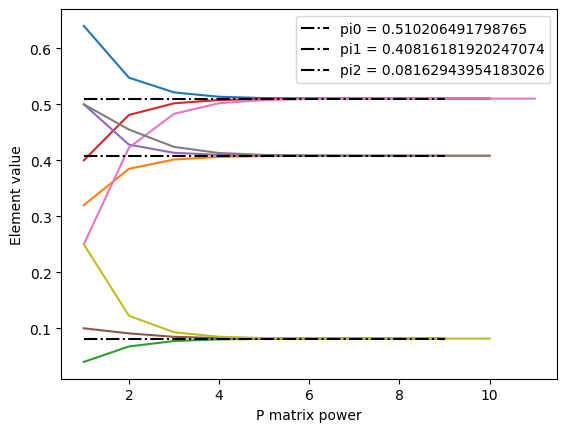

In [67]:
N = np.arange(1, 100, 1)
P = np.array([[0.64, 0.32, 0.04],
            [0.4, 0.5, 0.1],
            [0.25,0.5,0.25]])
e = 10**-5
array_elems_values = []
pi_values = []
for row_idx, row in enumerate(P):
    for elem_idx, elem in enumerate(row):
        for idx, n in enumerate(N):
            p = np.linalg.matrix_power(P,n)
            array_elems_values.append(p[row_idx][elem_idx])
            if idx != 0:
                if np.absolute(array_elems_values[idx-1] - array_elems_values[idx]) < e:
                    if row_idx == 0:
                        pi_values.append(array_elems_values[idx])
                    break;
        plt.plot(np.arange(1,idx+2), array_elems_values)
        array_elems_values.clear()
    
print(pi_values)
for pi_idx, pi in enumerate(pi_values):
    plt.plot(np.arange(1, 10), np.full((9,),pi), '-.k', label="pi{} = {}".format(pi_idx, pi))

plt.legend()
plt.xlabel("P matrix power")
plt.ylabel("Element value")

# Problem B

In [84]:
N = 10**4

x0 = np.array([1,0,0])
x1 = np.array([0,1,0])
x2 = np.array([0,0,1])

P = np.array([[0.64, 0.32, 0.04],
            [0.4, 0.5, 0.1],
            [0.25,0.5,0.25]])

starting_positions=np.array([x0,
                    x1,
                    x2])

pi0_counter = 0
pi1_counter = 0
pi2_counter = 0

for start_idx, starting_position in enumerate(starting_positions):
    current_position = starting_position
    
    for n in range(N):
        x = np.random.uniform(0,1)
        probabilities = np.matmul(current_position,P)
        #print(probabilities)
        if x < probabilities[0]:
            current_position = x0
            pi0_counter+=1
        elif x > probabilities[0] and x < probabilities[1] + probabilities[0]:
            current_position = x1
            pi1_counter+=1
        else:
            current_position = x2
            pi2_counter+=1
    print("For starting position x{}: pi0={}, pi1={}, pi2={}".format(start_idx, pi0_counter/N, pi1_counter/N, pi2_counter/N))
    pi0_counter = 0
    pi1_counter = 0
    pi2_counter = 0

For starting position x0: pi0=0.5061, pi1=0.4095, pi2=0.0844
For starting position x1: pi0=0.519, pi1=0.3988, pi2=0.0822
For starting position x2: pi0=0.5141, pi1=0.4081, pi2=0.0778


# Problem C

Text(0, 0.5, 'Probability of number of logged in users')

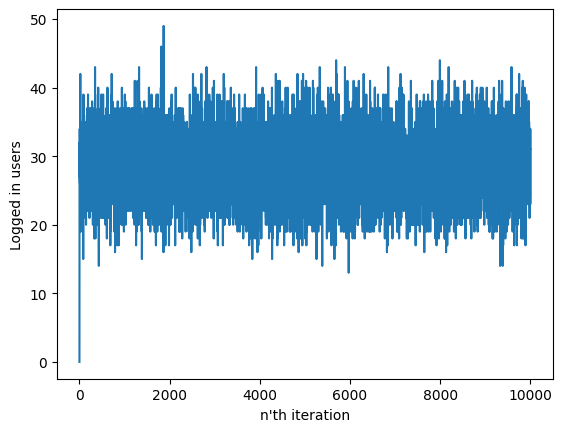

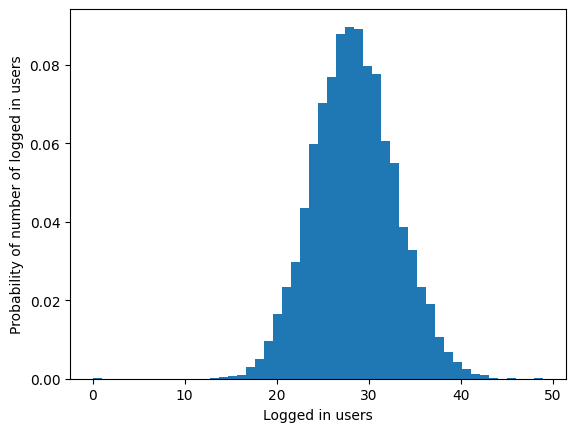

In [96]:
users_state = np.zeros(100)
trajectory = [0]
N=10**4
for n in range(N-1):
    for user_idx, user_state in enumerate(users_state):
        x = np.random.uniform(0,1)
        if user_state == 1:          
            if x < 0.5:
                users_state[user_idx] = 0
        else:
            if x < 0.2:
                users_state[user_idx] = 1
    trajectory.append(np.sum(users_state))
    
plt.figure(0)
plt.plot(np.arange(0,N,1),trajectory)
plt.xlabel("n'th iteration")
plt.ylabel("Logged in users")

plt.figure(1)
plt.hist(trajectory, 50, density = True)
plt.xlabel("Logged in users")
plt.ylabel("Probability of number of logged in users")

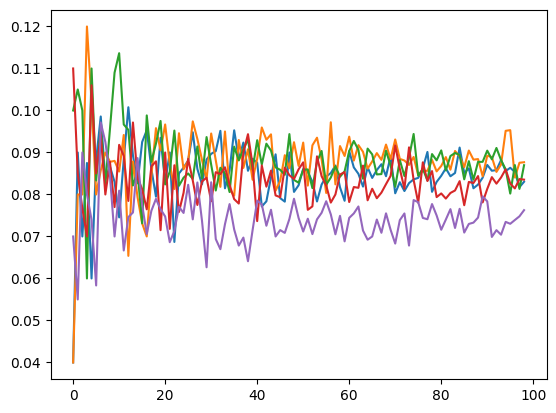

In [120]:
Ns = np.arange(100, 10**4, 100)
#biggest_pies = [27,28,29,30,31]
pi27_probs=[]
pi28_probs=[]
pi29_probs=[]
pi30_probs=[]
pi31_probs=[]
pies = {0:1}
users_state = np.zeros(100)

for N in Ns:
    for n in range(N-1):
        for user_idx, user_state in enumerate(users_state):
            x = np.random.uniform(0,1)
            if user_state == 1:          
                if x < 0.5:
                    users_state[user_idx] = 0
            else:
                if x < 0.2:
                    users_state[user_idx] = 1
        sum = int(np.sum(users_state))
        pies[sum] = pies[sum] + 1 if sum in pies else 1
    pi27_probs.append(pies[27]/N)
    pi28_probs.append(pies[28]/N)
    pi29_probs.append(pies[29]/N)
    pi30_probs.append(pies[30]/N)
    pi31_probs.append(pies[31]/N)
    pies = {}
    
plt.plot(pi27_probs)
plt.plot(pi28_probs)
plt.plot(pi29_probs)
plt.plot(pi30_probs)
plt.plot(pi31_probs)

# Problem D

Text(0, 0.5, 'Probability of number of logged in users')

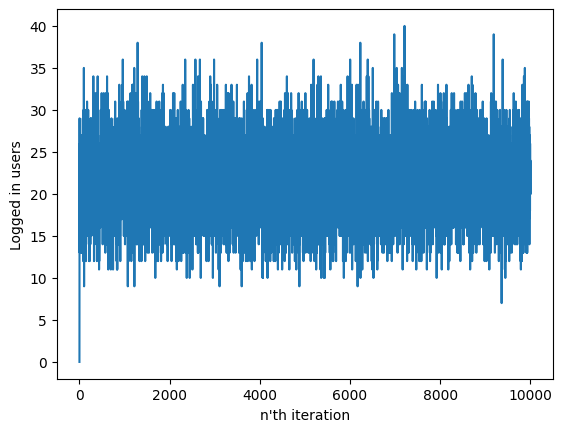

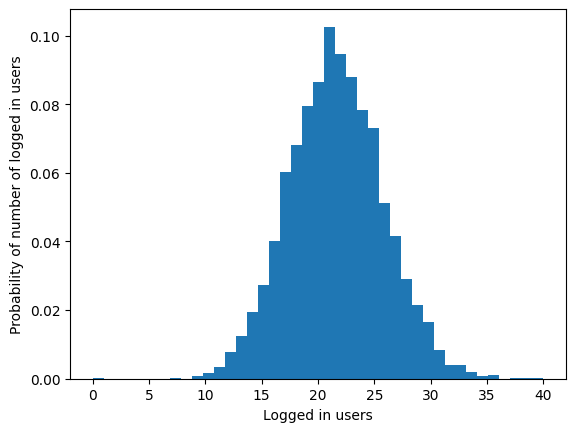

In [126]:
users_state = np.zeros(100)
wezel = 0
trajectory = [0]
N=10**4
for n in range(N-1):
    for user_idx, user_state in enumerate(users_state):
        x = np.random.uniform(0,1)
        if user_state == 1:          
            if x < 1 - (0.008*wezel + 0.1):
                users_state[user_idx] = 0
        else:
            if x < 0.2:
                users_state[user_idx] = 1
    wezel = np.sum(users_state)
    trajectory.append(wezel)
    
plt.figure(0)
plt.plot(np.arange(0,N,1),trajectory)
plt.xlabel("n'th iteration")
plt.ylabel("Logged in users")

plt.figure(1)
plt.hist(trajectory, 41, density = True)
plt.xlabel("Logged in users")
plt.ylabel("Probability of number of logged in users")

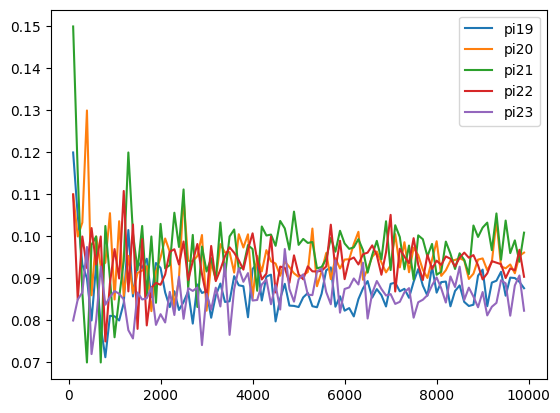

In [131]:
Ns = np.arange(100, 10**4, 100)
#biggest_pies = [20,21,22,23]
pi19_probs=[]
pi20_probs=[]
pi21_probs=[]
pi22_probs=[]
pi23_probs=[]

pies = {0:1}
users_state = np.zeros(100)

for N in Ns:
    for n in range(N-1):
        for user_idx, user_state in enumerate(users_state):
            x = np.random.uniform(0,1)
            if user_state == 1:          
                if x < 1 - (0.008*wezel + 0.1):
                    users_state[user_idx] = 0
            else:
                if x < 0.2:
                    users_state[user_idx] = 1
        sum = int(np.sum(users_state))
        pies[sum] = pies[sum] + 1 if sum in pies else 1
    pi19_probs.append(pies[19]/N if 19 in pies else 0)
    pi20_probs.append(pies[20]/N if 20 in pies else 0)
    pi21_probs.append(pies[21]/N if 21 in pies else 0)
    pi22_probs.append(pies[22]/N if 22 in pies else 0)
    pi23_probs.append(pies[23]/N if 23 in pies else 0)
    pies = {}
    
plt.plot(Ns, pi19_probs, label= "pi19")
plt.plot(Ns, pi20_probs, label= "pi20")
plt.plot(Ns, pi21_probs, label= "pi21")
plt.plot(Ns, pi22_probs, label= "pi22")
plt.plot(Ns, pi23_probs, label= "pi23")
plt.legend()
plt.show()

# Problem E

In [133]:
def expenential_distribution(x, rate):
    return rate*np.exp(x*-rate)

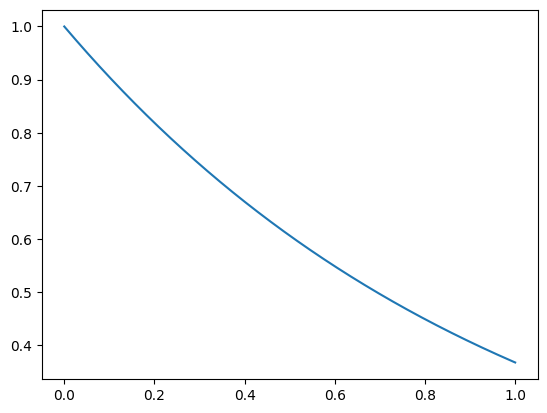

In [135]:
x = np.linspace(0,1,1000)
y = expenential_distribution(x, 1)
plt.plot(x,y)